### Data Verification Process for Construction of Toilets
#### Data verification
Since the data was collected by multiple vendors, and each of them were responsible to survey multiple sites, a data verification process is required which makes it easy to identify false information collected during the surveys and take action accordingly. Let's consider some sample use cases where the auditor can enter false information: 

Suppose the construction till Stage 4 was completed at Site A, and was only completed till Stage 2 at Site B. Now the vendor, who obviously wants to get the work done quickly and go home happy with his payments, can take the image of the Stage 4 construction site in the response for Stage 2 construction site and mark it as complete. It will be a difficult process for our partners to verify this information unless they visit the field and check for themselves which takes a lot of time. 
#### Problem to solve
Verification of data is important for our partners since it directly affects the finances and they don't want to pay if the construction is not actually completed. As a Data Analyst at SocialCops, your task here is to design a data verification process and share a report with client so they can take an action accordingly. 

### My approach
This project was a really interesting project as this is something that really tries to solve a real-world problem.
 I am here presenting you my analysis of the problem. During the initial phase, I was really concerned about many of the parameters I have not involved in my final analysis this was suggested by you because the main focus here was the location
 my understanding of the data set is as follows
A partner company is associated to build a toilet at various locations
There are many partners who are involved in this task
There are also a lot of locations at which this project is going on and it is required to be aware of the phase the work has reached a particular
 Dataset providers are divided into 5 files each file marking each phase

During my complete analysis there are certain assumptions that I have considered. It can also be noted that the analysis may role in two different direction given the case that these assumptions are not considered.

1.It is considered that the locations given in the first phase are true this means that the locations observed in the Phase 1 of the project are assumed to be correct location of the site, this data Set lacks the actual location of the site and relies on the location collected by the user therefore there is requirement of necessary assumption.

2.We can use advanced procedures to compare two images but as this data set does not contain images I have restricted it to just comparing the name of the image

3.I am also assumed that the correct location with respect to the given location can be tracked in a radius of 30 M if the distance is greater than that then it is considered to be a false entry this distance can be updated in the code.

4.I have also ignored some of the columns and believe that they not hold any value.

5.Further it is also assumed that each location has been visited at max 5 times which does not create any redundancy in the data.

This is a location based approached which I have followed after clearing my doubts with you. For any clarification on the process feel free to contact me 

In [89]:
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(15,9)})

%matplotlib inline

In [90]:
df1 = pd.read_csv('stage1_raw.csv')
df2 = pd.read_csv('stage2_raw.csv')
df3 = pd.read_csv('stage3_raw.csv')
df4 = pd.read_csv('stage4_raw.csv')
df5 = pd.read_csv('stage5_raw.csv')

In [91]:
df1.drop(columns=[ 'Response Parent ID' , 'Response Family ID' , 'Tags' ,'name_gp', 'name_village' , 'name_sub_district' , 'ulb_selection' , 'additional_image'] , axis=1, inplace=True)
df2.drop(columns=[ 'Response Parent ID' , 'Response Family ID' , 'Tags' ,'stage2_add_img'] , axis=1, inplace=True)
df3.drop(columns=[ 'Response Parent ID' , 'Response Family ID' , 'Tags' , 'stage3_add_img'] , axis=1, inplace=True)
df4.drop(columns=[ 'Response Parent ID' , 'Response Family ID' , 'Tags' , 'stage4_add_img'] , axis=1, inplace=True)
df5.drop(columns=[ 'Response Parent ID' , 'Response Family ID' , 'Tags' ] , axis=1, inplace=True)

In [31]:
df1.head()

,Response ID1,Submitted Time (UTC),Synced Time (UTC),type_of_toilet,ulb_selection_target,ulb_selection_ulb,ulb_selection_district,ulb_selection_partner_name,site_loc_s1_latitude,site_loc_s1_longitude,site_loc_s1_accuracy,beneficiary_id_type,toilet_pit_type,pit_yn_s1,image_stage1_pit
0,59cb5dfb-c410-4219-a6e7-5bbe8e48dece,2018-02-01T05:23:23.488000,2018-02-01T05:23:29.836000,1,500,Roorkee,Haridwar,GRAVIS,29.871606,77.856894,3.9,1.0,2,1,https://xxxxx/WOUFxYzv9zsYYJx3AFCP%2FyL8qo6gHb...
1,7d4c367d-7526-4f5f-9673-d94ca4c9fd81,2018-02-02T05:15:21.277000,2018-02-02T05:15:53.204000,1,809,Piran Kaliyar,Haridwar,VARDAN,29.920592,77.938680,5.5,1.0,2,1,https://xxxxx/WOUFxYzv9zsYYJx3AFCP%2FyL8qo6gHb...
2,5de4296a-49fd-4f57-ba3d-f5a176a86fad,2018-02-02T05:53:05.868000,2018-02-02T05:53:14.977000,1,809,Piran Kaliyar,Haridwar,VARDAN,29.920400,77.938948,5.6,1.0,2,1,https://xxxxx/WOUFxYzv9zsYYJx3AFCP%2FyL8qo6gHb...
3,6a6850f3-f6e6-4d36-a05d-b0d54be958fd,2018-02-02T11:02:37.425000,2018-02-03T04:01:03.016000,1,500,Roorkee,Haridwar,GRAVIS,29.871735,77.857029,8.0,1.0,2,1,https://xxxxx/WOUFxYzv9zsYYJx3AFCP%2FyL8qo6gHb...
4,d3e87031-a47f-4e4e-a395-366e9e2a64bd,2018-02-03T06:50:59.124000,2018-02-03T06:51:09.024000,1,171,Roorkee,Haridwar,Gramin Takniki Samiti,29.867653,77.910028,7.7,1.0,2,1,https://xxxxx/WOUFxYzv9zsYYJx3AFCP%2FyL8qo6gHb...


The first data frame contains the initial entry of the data. This contains all the locations where the first face has been completed and recorded. The response ID here is the unique ID attached to every row of  data submitted.

This data frame can be joined with the next phase using the beneficiary id in the Phase 2.This will also indicate the number of projects that were initially started and have been done till Phase 2.


In [109]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4151 entries, 0 to 4150
Data columns (total 9 columns):
Response ID2                              4151 non-null object
Submitted Time (UTC)                      4151 non-null object
Synced Time (UTC)                         4151 non-null object
beneficiary_stage2                        4151 non-null object
beneficiary_stage2_beneficiary_id_type    4151 non-null int64
stage2_image_foundation                   4151 non-null object
site_loc_s2_latitude                      4151 non-null float64
site_loc_s2_longitude                     4151 non-null float64
site_loc_s2_accuracy                      4151 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 291.9+ KB


The number of entries in phase2 are more than phase 1 this indicates another fallacy.

In [111]:
df2.head()

,Response ID2,Submitted Time (UTC),Synced Time (UTC),beneficiary_stage2,beneficiary_stage2_beneficiary_id_type,stage2_image_foundation,site_loc_s2_latitude,site_loc_s2_longitude,site_loc_s2_accuracy
0,491e4598-1d48-42ac-a75d-4aaed6bd7338,2018-02-02T05:53:41.368000,2018-02-02T05:53:45.179000,5de4296a-49fd-4f57-ba3d-f5a176a86fad,1,https://xxxxx/68qlx01e8cGO9qAFhNiE%2FfJvHBtb2Z...,29.920407,77.938952,5.500
1,f6ec5007-9837-4051-b04c-59a36e0b629f,2018-02-02T09:19:33.754000,2018-02-02T09:19:39.648000,851f66e4-7d84-4114-b0e5-eb36cf8788ba,1,https://xxxxx/68qlx01e8cGO9qAFhNiE%2FfJvHBtb2Z...,29.932156,77.929545,4.000
2,88277b3c-e86b-49d1-a682-690c8277dfd5,2018-02-03T04:08:15.722000,2018-02-03T04:08:19.561000,3287c365-1c21-418a-bdd7-fb3120a0f39c,1,https://xxxxx/68qlx01e8cGO9qAFhNiE%2FfJvHBtb2Z...,29.871497,77.856868,10.000
3,1f36b87a-539a-4ca8-b0b6-f78f7b59ee53,2018-02-03T06:02:03.228000,2018-02-03T06:02:05.983000,7e4d26ef-b9bd-42be-8bc6-5a381824a83f,1,https://xxxxx/68qlx01e8cGO9qAFhNiE%2FfJvHBtb2Z...,29.868745,77.912006,626.767
4,3ef075bc-a109-4402-ae5d-7a2b0e4b8a87,2018-02-03T06:25:35.695000,2018-02-03T06:25:40.563000,5f1f5a39-6406-4731-813d-d86506948982,1,https://xxxxx/68qlx01e8cGO9qAFhNiE%2FfJvHBtb2Z...,29.871667,77.856951,3.900


In [34]:
s1 =  df1.merge(df2 , left_on='Response ID1', right_on='beneficiary_stage2')

In [35]:
s1.head()

,Response ID1,Submitted Time (UTC)_x,Synced Time (UTC)_x,type_of_toilet,ulb_selection_target,ulb_selection_ulb,ulb_selection_district,ulb_selection_partner_name,site_loc_s1_latitude,site_loc_s1_longitude,...,image_stage1_pit,Response ID2,Submitted Time (UTC)_y,Synced Time (UTC)_y,beneficiary_stage2,beneficiary_stage2_beneficiary_id_type,stage2_image_foundation,site_loc_s2_latitude,site_loc_s2_longitude,site_loc_s2_accuracy
0,7d4c367d-7526-4f5f-9673-d94ca4c9fd81,2018-02-02T05:15:21.277000,2018-02-02T05:15:53.204000,1,809,Piran Kaliyar,Haridwar,VARDAN,29.920592,77.938680,...,https://xxxxx/WOUFxYzv9zsYYJx3AFCP%2FyL8qo6gHb...,fb5eb185-d6ae-48a0-9c83-209ab496d6f1,2018-02-02T05:21:02.766000,2018-02-02T05:21:08.575000,7d4c367d-7526-4f5f-9673-d94ca4c9fd81,1,https://xxxxx/68qlx01e8cGO9qAFhNiE%2FfJvHBtb2Z...,29.920565,77.938697,5.2
1,5de4296a-49fd-4f57-ba3d-f5a176a86fad,2018-02-02T05:53:05.868000,2018-02-02T05:53:14.977000,1,809,Piran Kaliyar,Haridwar,VARDAN,29.920400,77.938948,...,https://xxxxx/WOUFxYzv9zsYYJx3AFCP%2FyL8qo6gHb...,491e4598-1d48-42ac-a75d-4aaed6bd7338,2018-02-02T05:53:41.368000,2018-02-02T05:53:45.179000,5de4296a-49fd-4f57-ba3d-f5a176a86fad,1,https://xxxxx/68qlx01e8cGO9qAFhNiE%2FfJvHBtb2Z...,29.920407,77.938952,5.5
2,d3e87031-a47f-4e4e-a395-366e9e2a64bd,2018-02-03T06:50:59.124000,2018-02-03T06:51:09.024000,1,171,Roorkee,Haridwar,Gramin Takniki Samiti,29.867653,77.910028,...,https://xxxxx/WOUFxYzv9zsYYJx3AFCP%2FyL8qo6gHb...,05a548b1-701e-4c65-af23-acb161d1b417,2018-02-03T06:53:49.075000,2018-02-03T06:53:52.025000,d3e87031-a47f-4e4e-a395-366e9e2a64bd,1,https://xxxxx/68qlx01e8cGO9qAFhNiE%2FfJvHBtb2Z...,29.867563,77.910057,7.6
3,3b759850-ed8a-4f85-b78d-f728bb4bfbd1,2018-02-03T07:18:43.441000,2018-02-03T07:18:51.208000,1,171,Roorkee,Haridwar,Gramin Takniki Samiti,29.868050,77.908392,...,https://xxxxx/WOUFxYzv9zsYYJx3AFCP%2FyL8qo6gHb...,14ce0e42-dabc-4f74-85a2-5fb2a490c4b7,2018-02-03T07:20:45.889000,2018-02-03T07:20:49.677000,3b759850-ed8a-4f85-b78d-f728bb4bfbd1,1,https://xxxxx/68qlx01e8cGO9qAFhNiE%2FfJvHBtb2Z...,29.868072,77.908253,7.8
4,404284fc-5f78-4a37-849f-a106819ef8d5,2018-02-03T08:22:14.528000,2018-02-03T08:22:23.338000,1,53,Landhaura,Haridwar,LEADERS,29.799600,77.932707,...,https://xxxxx/WOUFxYzv9zsYYJx3AFCP%2FyL8qo6gHb...,9ab689c7-d615-4ced-b616-552e9d99f383,2018-02-08T07:29:25.942000,2018-02-08T07:29:30.125000,404284fc-5f78-4a37-849f-a106819ef8d5,1,https://xxxxx/68qlx01e8cGO9qAFhNiE%2FfJvHBtb2Z...,29.799515,77.932733,5.8


In [36]:
s1[s1['ulb_selection_target']==500]

,Response ID1,Submitted Time (UTC)_x,Synced Time (UTC)_x,type_of_toilet,ulb_selection_target,ulb_selection_ulb,ulb_selection_district,ulb_selection_partner_name,site_loc_s1_latitude,site_loc_s1_longitude,...,image_stage1_pit,Response ID2,Submitted Time (UTC)_y,Synced Time (UTC)_y,beneficiary_stage2,beneficiary_stage2_beneficiary_id_type,stage2_image_foundation,site_loc_s2_latitude,site_loc_s2_longitude,site_loc_s2_accuracy
14,897138a7-73ee-427e-92f8-a7704b19f2af,2018-02-06T08:15:56.990000,2018-02-06T08:16:04.512000,1,500,Roorkee,Haridwar,Bhartiya Gramothan Sanstha,29.881803,77.913806,...,https://xxxxx/WOUFxYzv9zsYYJx3AFCP%2FyL8qo6gHb...,830bf046-932f-492d-bb7d-2227eadbaab5,2018-02-06T08:31:55.568000,2018-02-06T08:32:01.378000,897138a7-73ee-427e-92f8-a7704b19f2af,1,https://xxxxx/68qlx01e8cGO9qAFhNiE%2FfJvHBtb2Z...,29.881831,77.913873,6.0
15,897138a7-73ee-427e-92f8-a7704b19f2af,2018-02-06T08:15:56.990000,2018-02-06T08:16:04.512000,1,500,Roorkee,Haridwar,Bhartiya Gramothan Sanstha,29.881803,77.913806,...,https://xxxxx/WOUFxYzv9zsYYJx3AFCP%2FyL8qo6gHb...,20f18a6b-834d-40b7-89e6-ac6b9a91bed9,2018-02-06T08:18:26.407000,2018-02-06T08:18:29.117000,897138a7-73ee-427e-92f8-a7704b19f2af,1,https://xxxxx/68qlx01e8cGO9qAFhNiE%2FfJvHBtb2Z...,29.881819,77.913812,6.0
16,ba94eec7-00e3-4052-8b77-765c51e8d575,2018-02-06T08:29:31.991000,2018-02-06T08:31:58.671000,1,500,Roorkee,Haridwar,Bhartiya Gramothan Sanstha,29.881812,77.913819,...,https://xxxxx/WOUFxYzv9zsYYJx3AFCP%2FyL8qo6gHb...,7db45325-9d87-4093-9c8d-b298a9460070,2018-02-24T06:52:17.019000,2018-02-24T06:52:21.814000,ba94eec7-00e3-4052-8b77-765c51e8d575,1,https://xxxxx/68qlx01e8cGO9qAFhNiE%2FfJvHBtb2Z...,29.881876,77.914028,10.0
18,e1984258-bb8e-4756-b75b-a195de38eb0c,2018-02-06T11:13:19.014000,2018-02-06T11:28:29.943000,1,500,Roorkee,Haridwar,Bhartiya Gramothan Sanstha,29.880413,77.906962,...,https://xxxxx/WOUFxYzv9zsYYJx3AFCP%2FyL8qo6gHb...,a3627f58-5881-4435-9f40-479c88fafa55,2018-02-07T05:42:38.646000,2018-02-07T05:42:42.715000,e1984258-bb8e-4756-b75b-a195de38eb0c,1,https://xxxxx/68qlx01e8cGO9qAFhNiE%2FfJvHBtb2Z...,29.878893,77.907810,4.5
21,ec22a1c0-5b14-4830-898b-724be7adff04,2018-02-07T03:23:09.815000,2018-02-07T03:23:23.123000,1,500,Roorkee,Haridwar,Bhartiya Gramothan Sanstha,29.880757,77.905860,...,https://xxxxx/WOUFxYzv9zsYYJx3AFCP%2FyL8qo6gHb...,2076c02a-245c-4c00-938f-af1463770b30,2018-02-07T03:24:26.041000,2018-02-07T03:24:30.856000,ec22a1c0-5b14-4830-898b-724be7adff04,1,https://xxxxx/68qlx01e8cGO9qAFhNiE%2FfJvHBtb2Z...,29.880802,77.905992,3.9
22,44e8c4c3-b0cb-4225-aef4-3131684bee10,2018-02-07T04:35:57.883000,2018-02-07T04:40:57.057000,1,500,Roorkee,Haridwar,Bhartiya Gramothan Sanstha,29.880411,77.919781,...,https://xxxxx/WOUFxYzv9zsYYJx3AFCP%2FyL8qo6gHb...,248e87a1-2970-4d9e-9a77-0e7e7f7f1e9d,2018-02-17T07:31:01.458000,2018-02-17T07:31:08.402000,44e8c4c3-b0cb-4225-aef4-3131684bee10,1,https://xxxxx/68qlx01e8cGO9qAFhNiE%2FfJvHBtb2Z...,29.882096,77.915606,10.0
23,d56ad561-274d-409a-a712-0db53206cb01,2018-02-07T04:54:06.012000,2018-02-07T04:54:33.082000,1,500,Roorkee,Haridwar,Bhartiya Gramothan Sanstha,29.880012,77.905850,...,https://xxxxx/WOUFxYzv9zsYYJx3AFCP%2FyL8qo6gHb...,806bd3d8-0d28-499a-97b0-d93ac094b89c,2018-02-07T04:55:03.831000,2018-02-07T04:55:16.205000,d56ad561-274d-409a-a712-0db53206cb01,1,https://xxxxx/68qlx01e8cGO9qAFhNiE%2FfJvHBtb2Z...,29.879513,77.905983,5.9
24,8abb7ec3-fcea-474e-8ea1-d89196d40bfd,2018-02-07T04:50:22.996000,2018-02-07T04:58:17.577000,1,500,Roorkee,Haridwar,Bhartiya Gramothan Sanstha,29.881608,77.914570,...,https://xxxxx/WOUFxYzv9zsYYJx3AFCP%2FyL8qo6gHb...,eb25a09d-e81e-4027-9992-ea2ab7078c31,2018-02-07T11:15:41.974000,2018-02-07T11:15:46.374000,8abb7ec3-fcea-474e-8ea1-d89196d40bfd,1,https://xxxxx/68qlx01e8cGO9qAFhNiE%2FfJvHBtb2Z...,29.881646,77.914792,6.0
25,9dac8f02-767f-4c69-95c5-11886457a650,2018-02-07T05:27:46.197000,2018-02-07T05:28:01.625000,1,500,Roorkee,Haridwar,Bhartiya Gramothan Sanstha,29.880245,77.906082,...,https://xxxxx/WOUFxYzv9zsYY

In [112]:
s1.drop_duplicates(subset = ['Response ID1','beneficiary_stage2'] , inplace = True)
s1.reset_index(inplace = True)

In [113]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801 entries, 0 to 3800
Data columns (total 27 columns):
level_0                                   3801 non-null int64
index                                     3801 non-null int64
Response ID1                              3801 non-null object
Submitted Time (UTC)_x                    3801 non-null object
Synced Time (UTC)_x                       3801 non-null object
type_of_toilet                            3801 non-null int64
ulb_selection_target                      3801 non-null int64
ulb_selection_ulb                         3801 non-null object
ulb_selection_district                    3801 non-null object
ulb_selection_partner_name                3801 non-null object
site_loc_s1_latitude                      3801 non-null float64
site_loc_s1_longitude                     3801 non-null float64
site_loc_s1_accuracy                      3801 non-null float64
beneficiary_id_type                       3801 non-null float64
toilet_pit_

Now that we have merged the two data sets of phase 1 and phase 2 we now have a location of both the points where the images are recorded. We can calculate the distance between the images recorded of the same toilet. We here consider that the Phase 1 location is right and therefore can calculate the distance of phase 1 and phase 2. This will help us eliminate the false data as the location should be close to each other. The distance between the location is kept to be 30m. Anything Above and over 30 metres is considered as a false data point and is eliminated.

The function defined below is used to calculate the distance between the two locations given it latitude and longitude. The lat  and log point are converted to radians and then used to calculate the distance.

In [114]:
from geopy.distance import vincenty
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0
def distance_calc (row):
    lat1 =radians(row['site_loc_s1_latitude'])
    lat2 =radians(row['site_loc_s2_latitude'])
    lon1= radians(row['site_loc_s1_longitude'])
    lon2 =radians(row['site_loc_s2_longitude'])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))


    distance = R* c
    return distance

In [115]:
s1['distance'] = s1.apply (lambda row: distance_calc (row),axis=1)

In [116]:
s1['distance'].describe()

count    3801.000000
mean        0.183938
std         2.974330
min         0.000000
25%         0.007064
50%         0.015442
75%         0.040188
max       173.105630
Name: distance, dtype: float64

The distance column can be analysed by by plotting some plots like the violin plot and the box plot. Both of these float help us to analyse the outliers also tell as the spread and distribution off the data. Define plot also indicates the real spread of the data where is the real density.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


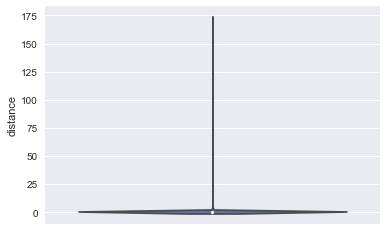

In [117]:
sns.violinplot(y=s1['distance'])

This plot shows that the most od the values are located at the lower end but there are some values that make the graph look like this . A box plot can be further used to analyze the situation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


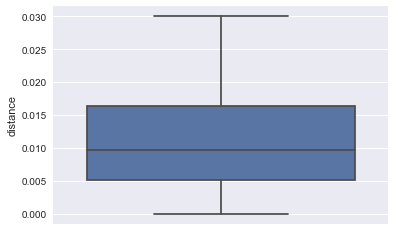

In [118]:
a = s1[s1['distance']<0.03]
sns.boxplot(y = a['distance'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


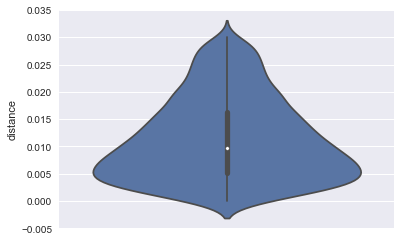

In [119]:
sns.violinplot(y = a['distance'])

In [120]:
a['distance'].describe()

count    2638.000000
mean        0.011247
std         0.007519
min         0.000000
25%         0.005170
50%         0.009739
75%         0.016361
max         0.029997
Name: distance, dtype: float64

In [121]:
len(a)

2638

After eliminating the false entries based on location only 2638 destinations have successfully completed Phase 2.

### Moving into phase 3

In [47]:
df3.head()

,Response ID3,Submitted Time (UTC),Synced Time (UTC),beneficiary_s3,stage3_image_structure,site_loc_s3_latitude,site_loc_s3_longitude,site_loc_s3_accuracy
0,6d19c872-fa58-434f-aab2-115403e48bca,2018-02-02T05:29:59.128000,2018-02-02T05:30:06.209000,709f8521-68f0-4539-a280-62d8660f0131,https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjj...,29.920537,77.938783,5.500
1,0dfe2141-7494-42db-b94e-294622cda9d1,2018-02-02T05:47:22.410000,2018-02-02T05:47:26.441000,dd426661-3366-45ed-bdde-997d2cae167e,https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjj...,29.920382,77.938902,5.500
2,40461952-22cd-47f9-98a3-2f87c8cab76b,2018-02-02T06:14:18.481000,2018-02-02T06:14:22.168000,0c2229c4-9cb8-4293-8f5c-e7c10c9d90c6,https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjj...,29.871054,77.856799,3.000
3,daecf42a-e8a5-4999-8678-7cca61a2e813,2018-02-03T06:04:15.621000,2018-02-03T06:04:18.253000,1f36b87a-539a-4ca8-b0b6-f78f7b59ee53,https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjj...,29.879699,77.919781,2299.999
4,5a48de97-aba9-494e-b998-430ba013461a,2018-02-03T06:58:07.531000,2018-02-03T06:58:10.884000,05a548b1-701e-4c65-af23-acb161d1b417,https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjj...,29.867595,77.910243,7.200


In [49]:
df3['stage3_image_structure'].value_counts()

https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjjNDmCzNTuFIj%2F3AcsErRT21J9rGXeNGIT%2Fcc20ad03-c6cb-435e-af1e-e249dfe76b93.jpeg    1
https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjjNDmCzNTuFIj%2FH8sQ9IpNz4pN7fwRZKIs%2F3de376e6-ad5c-489f-9ec6-1d318896e5e0.jpeg    1
https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjjNDmCzNTuFIj%2FzYEC7dMx5I7rc8asprAp%2F966006e6-61e9-4f39-9cd0-b8377fd409c1.jpeg    1
https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjjNDmCzNTuFIj%2FJleN8qH0NPclnEnBjxzc%2Fae4a636f-6df7-442b-b84a-0bd987eb1aef.jpeg    1
https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjjNDmCzNTuFIj%2FbsTX1OgKDleExyjfveq1%2Fb59ad55e-4aca-41e1-a212-116b90b22985.jpeg    1
https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjjNDmCzNTuFIj%2FmnIoyD3dbuoYnIwSol4q%2F05296a4b-c361-4f46-8aa8-ad34bb663a56.jpeg    1
https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjjNDmCzNTuFIj%2FFuEvOccDpEAfY8GG1npR%2F8d209f72-7642-4ae6-8777-3f36bcd22a67.jpeg    1
https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjjNDmCzNTuFIj%2FJleN8qH0NPclnEnBjxzc%2F05ffb02

In [50]:
s2 = a.merge(df3, left_on='Response ID2', right_on='beneficiary_s3')

In [51]:
s2.head()

,index,Response ID1,Submitted Time (UTC)_x,Synced Time (UTC)_x,type_of_toilet,ulb_selection_target,ulb_selection_ulb,ulb_selection_district,ulb_selection_partner_name,site_loc_s1_latitude,...,site_loc_s2_accuracy,distance,Response ID3,Submitted Time (UTC),Synced Time (UTC),beneficiary_s3,stage3_image_structure,site_loc_s3_latitude,site_loc_s3_longitude,site_loc_s3_accuracy
0,0,7d4c367d-7526-4f5f-9673-d94ca4c9fd81,2018-02-02T05:15:21.277000,2018-02-02T05:15:53.204000,1,809,Piran Kaliyar,Haridwar,VARDAN,29.920592,...,5.2,0.003378,dd263f6a-ce8f-4725-8666-72f7ad883396,2018-02-02T05:21:57.775000,2018-02-02T05:22:02.198000,fb5eb185-d6ae-48a0-9c83-209ab496d6f1,https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjj...,29.920655,77.938722,5.1
1,1,5de4296a-49fd-4f57-ba3d-f5a176a86fad,2018-02-02T05:53:05.868000,2018-02-02T05:53:14.977000,1,809,Piran Kaliyar,Haridwar,VARDAN,29.920400,...,5.5,0.000814,68278ad4-344d-481e-9e51-ed809d630d77,2018-02-02T05:54:20.890000,2018-02-02T05:54:25.341000,491e4598-1d48-42ac-a75d-4aaed6bd7338,https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjj...,29.920407,77.938952,5.5
2,1,5de4296a-49fd-4f57-ba3d-f5a176a86fad,2018-02-02T05:53:05.868000,2018-02-02T05:53:14.977000,1,809,Piran Kaliyar,Haridwar,VARDAN,29.920400,...,5.5,0.000814,aca9a007-d768-4803-949f-4372f74384bf,2018-02-02T05:54:52.969000,2018-02-02T05:54:56.277000,491e4598-1d48-42ac-a75d-4aaed6bd7338,https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjj...,29.920470,77.938900,5.7
3,2,d3e87031-a47f-4e4e-a395-366e9e2a64bd,2018-02-03T06:50:59.124000,2018-02-03T06:51:09.024000,1,171,Roorkee,Haridwar,Gramin Takniki Samiti,29.867653,...,7.6,0.010379,5a48de97-aba9-494e-b998-430ba013461a,2018-02-03T06:58:07.531000,2018-02-03T06:58:10.884000,05a548b1-701e-4c65-af23-acb161d1b417,https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjj...,29.867595,77.910243,7.2
4,2,d3e87031-a47f-4e4e-a395-366e9e2a64bd,2018-02-03T06:50:59.124000,2018-02-03T06:51:09.024000,1,171,Roorkee,Haridwar,Gramin Takniki Samiti,29.867653,...,7.6,0.010379,d4470762-4e3d-4a69-8147-bd025653919e,2018-02-03T06:59:54.324000,2018-02-03T06:59:57.432000,05a548b1-701e-4c65-af23-acb161d1b417,https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjj...,29.867600,77.910092,7.5


In [52]:
len(s2)

2672

In [53]:
s2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2672 entries, 0 to 2671
Data columns (total 34 columns):
index                                     2672 non-null int64
Response ID1                              2672 non-null object
Submitted Time (UTC)_x                    2672 non-null object
Synced Time (UTC)_x                       2672 non-null object
type_of_toilet                            2672 non-null int64
ulb_selection_target                      2672 non-null int64
ulb_selection_ulb                         2672 non-null object
ulb_selection_district                    2672 non-null object
ulb_selection_partner_name                2672 non-null object
site_loc_s1_latitude                      2672 non-null float64
site_loc_s1_longitude                     2672 non-null float64
site_loc_s1_accuracy                      2672 non-null float64
beneficiary_id_type                       2672 non-null float64
toilet_pit_type                           2672 non-null int64
pit_yn_s1  

In [54]:
s2.drop_duplicates(subset = ['Response ID2','beneficiary_stage3'] , inplace = True)
s2.reset_index(inplace = True)

In [55]:
len(s2)

2548

This states that only 2548 valid entries that have completed the Phase 3 of the process, 
Further we will calculate the distance and remove the false data that was collected

In [57]:
from geopy.distance import vincenty
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0
def distance_calc2 (row):
    lat1 =radians(row['site_loc_s1_latitude'])
    lat2 =radians(row['site_loc_s3_latitude'])
    lon1= radians(row['site_loc_s1_longitude'])
    lon2 =radians(row['site_loc_s3_longitude'])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))


    distance = R* c
    return distance

In [58]:
s2['distance2'] = s2.apply (lambda row: distance_calc2 (row),axis=1)

In [59]:
s2['distance2'].describe()

count    2548.000000
mean        0.063396
std         1.156773
min         0.000000
25%         0.005697
50%         0.010690
75%         0.019491
max        57.528045
Name: distance2, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


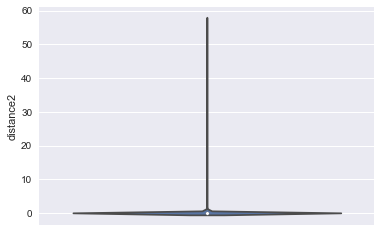

In [60]:
sns.violinplot(y=s2['distance2'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


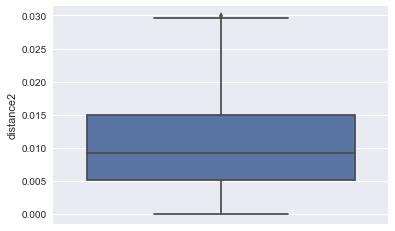

In [61]:
b = s2[s2['distance2']<0.03]
sns.boxplot(y = b['distance2'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


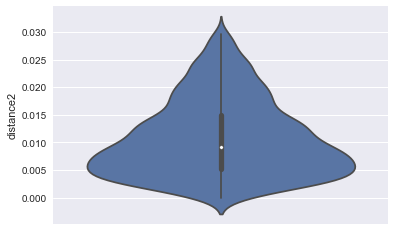

In [62]:
sns.violinplot(y = b['distance2'])

In [63]:
len(b)

2211

Hence we can see that removing all the false entries the number drops down to 2211

In [64]:
b.drop(labels=['level_0' , 'index'] , inplace= True , axis=1)
b.reset_index()
b.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Response ID1,Submitted Time (UTC)_x,Synced Time (UTC)_x,type_of_toilet,ulb_selection_target,ulb_selection_ulb,ulb_selection_district,ulb_selection_partner_name,site_loc_s1_latitude,site_loc_s1_longitude,...,distance,Response ID3,Submitted Time (UTC),Synced Time (UTC),beneficiary_s3,stage3_image_structure,site_loc_s3_latitude,site_loc_s3_longitude,site_loc_s3_accuracy,distance2
0,7d4c367d-7526-4f5f-9673-d94ca4c9fd81,2018-02-02T05:15:21.277000,2018-02-02T05:15:53.204000,1,809,Piran Kaliyar,Haridwar,VARDAN,29.920592,77.938680,...,0.003378,dd263f6a-ce8f-4725-8666-72f7ad883396,2018-02-02T05:21:57.775000,2018-02-02T05:22:02.198000,fb5eb185-d6ae-48a0-9c83-209ab496d6f1,https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjj...,29.920655,77.938722,5.1,0.008108
1,5de4296a-49fd-4f57-ba3d-f5a176a86fad,2018-02-02T05:53:05.868000,2018-02-02T05:53:14.977000,1,809,Piran Kaliyar,Haridwar,VARDAN,29.920400,77.938948,...,0.000814,68278ad4-344d-481e-9e51-ed809d630d77,2018-02-02T05:54:20.890000,2018-02-02T05:54:25.341000,491e4598-1d48-42ac-a75d-4aaed6bd7338,https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjj...,29.920407,77.938952,5.5,0.000814
2,d3e87031-a47f-4e4e-a395-366e9e2a64bd,2018-02-03T06:50:59.124000,2018-02-03T06:51:09.024000,1,171,Roorkee,Haridwar,Gramin Takniki Samiti,29.867653,77.910028,...,0.010379,5a48de97-aba9-494e-b998-430ba013461a,2018-02-03T06:58:07.531000,2018-02-03T06:58:10.884000,05a548b1-701e-4c65-af23-acb161d1b417,https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjj...,29.867595,77.910243,7.2,0.021728
3,3b759850-ed8a-4f85-b78d-f728bb4bfbd1,2018-02-03T07:18:43.441000,2018-02-03T07:18:51.208000,1,171,Roorkee,Haridwar,Gramin Takniki Samiti,29.868050,77.908392,...,0.013566,fb3282fd-5e7f-4038-9b0a-250cbc386e69,2018-02-03T07:21:58.200000,2018-02-03T07:22:02.021000,14ce0e42-dabc-4f74-85a2-5fb2a490c4b7,https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjj...,29.868043,77.908293,7.8,0.009520
4,404284fc-5f78-4a37-849f-a106819ef8d5,2018-02-03T08:22:14.528000,2018-02-03T08:22:23.338000,1,53,Landhaura,Haridwar,LEADERS,29.799600,77.932707,...,0.009797,7fb0e739-ae58-42ef-9fd4-b98e58910d1f,2018-02-08T07:30:40.434000,2018-02-08T07:30:46.747000,9ab689c7-d615-4ced-b616-552e9d99f383,https://xxxxx/krTbHm4zjHFEn0MkAMIi%2FB7ePNyFjj...,29.799588,77.932540,5.5,0.016143


### The Phase 4

In [104]:
df4.head()

,Response ID4,Submitted Time (UTC),Synced Time (UTC),beneficiary_s4,stage4_image_structure,site_loc_s4_latitude,site_loc_s4_longitude,site_loc_s4_accuracy
0,74fb7221-d0fd-4a88-aba6-12196d0d582d,2018-02-02T09:24:59.363000,2018-02-02T09:25:04.424000,650b2425-76c5-41a3-b92a-cb64ad5b7e48,https://xxxxx/O9RUEXpvy8zTygtwWCaP%2FKuAXxdBB7...,29.932268,77.929416,4.0
1,6570bfe1-4359-4130-83bd-62772aef343b,2018-02-02T09:27:23.075000,2018-02-02T09:27:31.910000,807cc648-93ae-4851-95bd-503cbf8501d4,https://xxxxx/O9RUEXpvy8zTygtwWCaP%2FKuAXxdBB7...,29.932212,77.929454,4.0
2,3c458b13-be8e-415a-8336-810c040db0d8,2018-02-03T06:32:50.980000,2018-02-03T06:32:53.169000,ee54ac79-badf-41e6-bbcb-9bfcaf63d2da,https://xxxxx/O9RUEXpvy8zTygtwWCaP%2FKuAXxdBB7...,29.867483,77.910207,7.8
3,ee4008c1-3052-44d9-8582-975095b38a49,2018-02-03T07:23:33.584000,2018-02-03T07:23:37.383000,fb3282fd-5e7f-4038-9b0a-250cbc386e69,https://xxxxx/O9RUEXpvy8zTygtwWCaP%2FKuAXxdBB7...,29.868100,77.908300,7.7
4,2139c161-39b0-4675-9839-e93d32ac638f,2018-02-04T07:18:49.950000,2018-02-04T07:18:54.594000,159ead12-a96d-48d6-821f-fffdeacc12ae,https://xxxxx/O9RUEXpvy8zTygtwWCaP%2FKuAXxdBB7...,29.923958,77.940597,5.4


In [65]:
len(b)

2211

In [66]:
len(df4)

4117

In [67]:
s3 = b.merge(df4, left_on='Response ID3', right_on='beneficiary_s4')

In [68]:
s3.head()

,Response ID1,Submitted Time (UTC)_x,Synced Time (UTC)_x,type_of_toilet,ulb_selection_target,ulb_selection_ulb,ulb_selection_district,ulb_selection_partner_name,site_loc_s1_latitude,site_loc_s1_longitude,...,site_loc_s3_accuracy,distance2,Response ID4,Submitted Time (UTC)_y,Synced Time (UTC)_y,beneficiary_s4,stage4_image_structure,site_loc_s4_latitude,site_loc_s4_longitude,site_loc_s4_accuracy
0,7d4c367d-7526-4f5f-9673-d94ca4c9fd81,2018-02-02T05:15:21.277000,2018-02-02T05:15:53.204000,1,809,Piran Kaliyar,Haridwar,VARDAN,29.920592,77.938680,...,5.1,0.008108,9dc289c8-dc64-4733-9a9c-cce5abceb326,2018-02-02T05:23:12.740000,2018-02-02T05:23:16.461000,dd263f6a-ce8f-4725-8666-72f7ad883396,https://xxxxx/O9RUEXpvy8zTygtwWCaP%2FKuAXxdBB7...,29.920613,77.938707,5.4
1,7d4c367d-7526-4f5f-9673-d94ca4c9fd81,2018-02-02T05:15:21.277000,2018-02-02T05:15:53.204000,1,809,Piran Kaliyar,Haridwar,VARDAN,29.920592,77.938680,...,5.1,0.008108,6463b1ee-937f-4363-9b69-f27cab09c597,2018-02-14T10:42:57.506000,2018-02-14T10:43:00.991000,dd263f6a-ce8f-4725-8666-72f7ad883396,https://xxxxx/O9RUEXpvy8zTygtwWCaP%2FKuAXxdBB7...,29.920579,77.938931,4.0
2,5de4296a-49fd-4f57-ba3d-f5a176a86fad,2018-02-02T05:53:05.868000,2018-02-02T05:53:14.977000,1,809,Piran Kaliyar,Haridwar,VARDAN,29.920400,77.938948,...,5.5,0.000814,17eb5953-17b8-4aaa-90ed-5e7403577704,2018-02-14T10:39:03.884000,2018-02-14T10:39:09.631000,68278ad4-344d-481e-9e51-ed809d630d77,https://xxxxx/O9RUEXpvy8zTygtwWCaP%2FKuAXxdBB7...,29.920780,77.939026,6.0
3,d3e87031-a47f-4e4e-a395-366e9e2a64bd,2018-02-03T06:50:59.124000,2018-02-03T06:51:09.024000,1,171,Roorkee,Haridwar,Gramin Takniki Samiti,29.867653,77.910028,...,7.2,0.021728,4127d6a6-e835-48d2-a3ec-0b4818d5d371,2018-02-03T07:01:59.053000,2018-02-03T07:02:01.977000,5a48de97-aba9-494e-b998-430ba013461a,https://xxxxx/O9RUEXpvy8zTygtwWCaP%2FKuAXxdBB7...,29.867560,77.910043,7.5
4,3b759850-ed8a-4f85-b78d-f728bb4bfbd1,2018-02-03T07:18:43.441000,2018-02-03T07:18:51.208000,1,171,Roorkee,Haridwar,Gramin Takniki Samiti,29.868050,77.908392,...,7.8,0.009520,ee4008c1-3052-44d9-8582-975095b38a49,2018-02-03T07:23:33.584000,2018-02-03T07:23:37.383000,fb3282fd-5e7f-4038-9b0a-250cbc386e69,https://xxxxx/O9RUEXpvy8zTygtwWCaP%2FKuAXxdBB7...,29.868100,77.908300,7.7


In [69]:
len(s3)

2307

In [70]:
s3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2307 entries, 0 to 2306
Data columns (total 42 columns):
Response ID1                              2307 non-null object
Submitted Time (UTC)_x                    2307 non-null object
Synced Time (UTC)_x                       2307 non-null object
type_of_toilet                            2307 non-null int64
ulb_selection_target                      2307 non-null int64
ulb_selection_ulb                         2307 non-null object
ulb_selection_district                    2307 non-null object
ulb_selection_partner_name                2307 non-null object
site_loc_s1_latitude                      2307 non-null float64
site_loc_s1_longitude                     2307 non-null float64
site_loc_s1_accuracy                      2307 non-null float64
beneficiary_id_type                       2307 non-null float64
toilet_pit_type                           2307 non-null int64
pit_yn_s1                                 2307 non-null int64
image_stage

In [71]:
s3.drop_duplicates(subset = ['Response ID3','beneficiary_stage4'] , inplace = True)
s3.reset_index(inplace = True)

In [72]:
len(s3)

2125

The Fall from Phase 3 to Phase 4 is very low and the number drops only by a 100 to 2125 and this can be assumed that projects conversion form pphase 3 to 4 is maximum

In [74]:
from geopy.distance import vincenty
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0
def distance_calc3 (row):
    lat1 =radians(row['site_loc_s1_latitude'])
    lat2 =radians(row['site_loc_s4_latitude'])
    lon1= radians(row['site_loc_s1_longitude'])
    lon2 =radians(row['site_loc_s4_longitude'])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))


    distance = R* c
    return distance

In [75]:
s3['distance3'] = s3.apply (lambda row: distance_calc3 (row),axis=1)

In [76]:
s3['distance3'].describe()

count    2125.000000
mean        0.132466
std         3.887521
min         0.000000
25%         0.006555
50%         0.011159
75%         0.019891
max       178.789933
Name: distance3, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


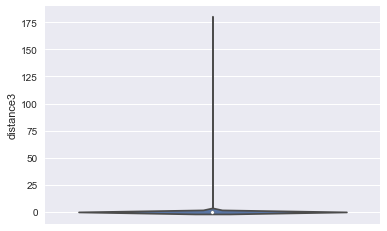

In [77]:
sns.violinplot(y=s3['distance3'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


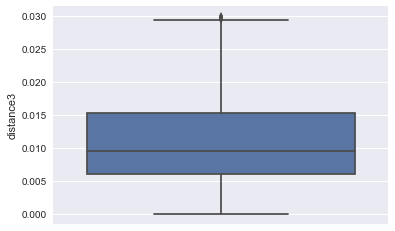

In [78]:
c = s3[s3['distance3']<0.03]
sns.boxplot(y = c['distance3'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


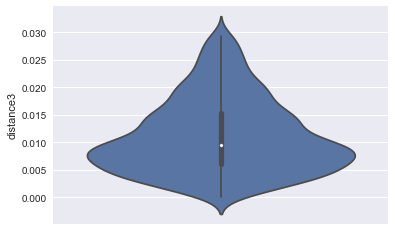

In [79]:
sns.violinplot(y =  c['distance3'])

In [80]:
len(c)

1827

The number of false entries on the other hand drops this number further to 1827, which means only 1827 projects have collected the right data till stage 4

### Phase 5, The Final Phase

The stage 5 marks the completion of the project, the stage 5 includes multiple pictures and is the final stage where the partner can check how the work is done or not. I consider that the presence of images in all the case is a must and therefore discarded those entries where the image is absent.

In [81]:
df5.head()

,Response ID5,Submitted Time (UTC),Synced Time (UTC),beneficiary_s5,stage5_image_toilet,stage5_image_pit,stage5_image_fittings,stage5_image_fittings2,site_loc_s5_latitude,site_loc_s5_longitude,site_loc_s5_accuracy,stage5_signature
0,b51b5ceb-8759-4893-8919-cc25bd70d395,2018-02-28T06:09:07.376000,2018-02-28T06:09:12.231000,060fff45-b265-4d94-bf8e-7877f7af7abe,https://xxxxx/oryd5KfxstGSGNrosfZc%2FrA2bGFeBC...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FEDQXgyOAt...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoXJCUBpno...,NaN,29.920848,77.937960,7.600,NaN
1,2146243f-3588-4565-88d9-f12674d62ac4,2018-03-09T12:00:45.921000,2018-03-09T12:00:53.429000,d369f0fa-814d-418f-ab47-7a175aef931d,https://xxxxx/oryd5KfxstGSGNrosfZc%2FrA2bGFeBC...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FEDQXgyOAt...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoXJCUBpno...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoYuqgCoYY...,29.931907,77.927964,10.000,https://xxxxx/oryd5KfxstGSGNrosfZc%2FDQalHHza3...
2,e784dc15-f947-4245-b85c-b4961d41d1bc,2018-04-01T13:18:15.130000,2018-04-01T13:21:09.971000,3f52c0a1-003d-4508-afc5-87766397723f,https://xxxxx/oryd5KfxstGSGNrosfZc%2FrA2bGFeBC...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FEDQXgyOAt...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoXJCUBpno...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoYuqgCoYY...,28.969783,79.407171,2505.000,https://xxxxx/oryd5KfxstGSGNrosfZc%2FDQalHHza3...
3,93453b03-8c30-457f-8678-9aa8f09bc1e2,2018-04-09T13:01:12.009000,2018-04-09T13:01:22.272000,6c66d413-d9a6-457b-b3a9-5ce0474f2b7c,https://xxxxx/oryd5KfxstGSGNrosfZc%2FrA2bGFeBC...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FEDQXgyOAt...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoXJCUBpno...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoYuqgCoYY...,29.882586,77.864147,10.000,https://xxxxx/oryd5KfxstGSGNrosfZc%2FDQalHHza3...
4,edbf85ab-d5fa-4f2c-ba7b-9e860cee5946,2018-04-12T11:49:07.472000,2018-04-12T11:49:18.176000,aa28a742-db59-4227-9268-bdb6707e4d22,https://xxxxx/oryd5KfxstGSGNrosfZc%2FrA2bGFeBC...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FEDQXgyOAt...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoXJCUBpno...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoYuqgCoYY...,29.864618,77.906705,56.401,https://xxxxx/oryd5KfxstGSGNrosfZc%2FDQalHHza3...


In [92]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 12 columns):
Response ID5              605 non-null object
Submitted Time (UTC)      605 non-null object
Synced Time (UTC)         605 non-null object
beneficiary_s5            605 non-null object
stage5_image_toilet       605 non-null object
stage5_image_pit          605 non-null object
stage5_image_fittings     605 non-null object
stage5_image_fittings2    589 non-null object
site_loc_s5_latitude      605 non-null float64
site_loc_s5_longitude     605 non-null float64
site_loc_s5_accuracy      605 non-null float64
stage5_signature          602 non-null object
dtypes: float64(3), object(9)
memory usage: 56.8+ KB


In [93]:
len(df5)

605

In [95]:
df5.dropna(axis=0, inplace = True)


In [96]:
s4 = c.merge(df5, left_on='Response ID4', right_on='beneficiary_s5')

In [97]:
s4.drop_duplicates(subset = ['Response ID4','beneficiary_stage5'] , inplace = True)
s4.reset_index(inplace = True)

In [98]:
len(s4)

194

In [99]:
from geopy.distance import vincenty
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0
def distance_calc4 (row):
    lat1 =radians(row['site_loc_s1_latitude'])
    lat2 =radians(row['site_loc_s5_latitude'])
    lon1= radians(row['site_loc_s1_longitude'])
    lon2 =radians(row['site_loc_s5_longitude'])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))


    distance = R* c
    return distance

In [100]:
s4['distance4'] = s4.apply (lambda row: distance_calc4 (row),axis=1)

In [101]:
s4['distance4'].describe()

count    194.000000
mean       1.027174
std       11.428067
min        0.000319
25%        0.010277
50%        0.018626
75%        0.034929
max      158.903657
Name: distance4, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


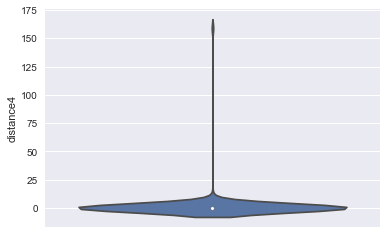

In [102]:
sns.violinplot(y=s4['distance4'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


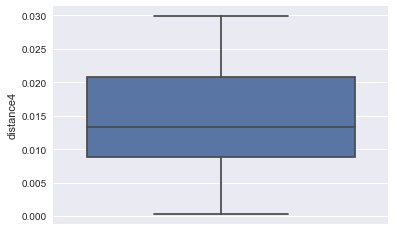

In [103]:
d = s4[s4['distance4']<0.03]
sns.boxplot(y = d['distance4'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


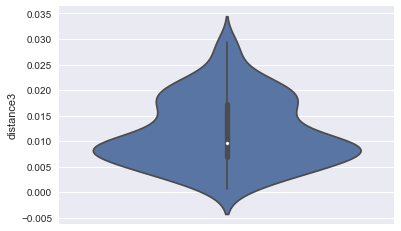

In [104]:
sns.violinplot(y = d['distance3'])

In [105]:
d.drop(labels=['level_0' , 'index'] , inplace= True , axis=1)
d.reset_index()
d.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Response ID1,Submitted Time (UTC)_x,Synced Time (UTC)_x,type_of_toilet,ulb_selection_target,ulb_selection_ulb,ulb_selection_district,ulb_selection_partner_name,site_loc_s1_latitude,site_loc_s1_longitude,...,beneficiary_s5,stage5_image_toilet,stage5_image_pit,stage5_image_fittings,stage5_image_fittings2,site_loc_s5_latitude,site_loc_s5_longitude,site_loc_s5_accuracy,stage5_signature,distance4
0,64783c2c-933b-4bd7-9777-af772a5a4a92,2018-02-07T06:12:07.845000,2018-02-07T06:12:19.484000,1,350,Rudrapur,U S Nagar,Habitat for Humanity,28.976661,79.408877,...,fbbb3cd8-1cc8-48d7-97d4-148704847e8d,https://xxxxx/oryd5KfxstGSGNrosfZc%2FrA2bGFeBC...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FEDQXgyOAt...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoXJCUBpno...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoYuqgCoYY...,28.976573,79.408910,10.000,https://xxxxx/oryd5KfxstGSGNrosfZc%2FDQalHHza3...,0.010216
1,362c5102-767c-4a0c-9027-aa04a36ec35f,2018-02-07T06:14:29.493000,2018-02-07T06:16:12.916000,1,350,Haldwani,Nanital,Habitat for Humanity,29.243867,79.523930,...,2c7a8292-ac4e-4b68-a9e6-cbb218612413,https://xxxxx/oryd5KfxstGSGNrosfZc%2FrA2bGFeBC...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FEDQXgyOAt...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoXJCUBpno...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoYuqgCoYY...,29.243955,79.523645,10.000,https://xxxxx/oryd5KfxstGSGNrosfZc%2FDQalHHza3...,0.029326
2,df0ba32b-813f-47d3-bbde-41e116d1cd97,2018-02-07T06:34:36.275000,2018-02-07T06:34:58.129000,1,350,Rudrapur,U S Nagar,Habitat for Humanity,28.976668,79.409131,...,3deaef0b-4ddd-4eb7-aa2d-d184c54e094b,https://xxxxx/oryd5KfxstGSGNrosfZc%2FrA2bGFeBC...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FEDQXgyOAt...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoXJCUBpno...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoYuqgCoYY...,28.976725,79.409177,10.000,https://xxxxx/oryd5KfxstGSGNrosfZc%2FDQalHHza3...,0.007749
3,443a0744-0cb9-47be-9917-d90a2bb14574,2018-02-07T06:55:32.809000,2018-02-07T06:55:40.164000,1,500,Selaqui,Dehradun,Gramin Takniki Samiti,30.348355,77.851085,...,b52040ab-ad1b-4e61-9ce5-f8c02f718d0b,https://xxxxx/oryd5KfxstGSGNrosfZc%2FrA2bGFeBC...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FEDQXgyOAt...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoXJCUBpno...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoYuqgCoYY...,30.348449,77.851040,14.231,https://xxxxx/oryd5KfxstGSGNrosfZc%2FDQalHHza3...,0.011307
4,addd8269-43d2-4108-b0f3-de1b8f229c9f,2018-02-07T08:44:43.590000,2018-02-07T09:37:51.513000,1,350,Rudrapur,U S Nagar,Habitat for Humanity,28.974574,79.409833,...,80564133-e6eb-4943-99b0-efa43008c58f,https://xxxxx/oryd5KfxstGSGNrosfZc%2FrA2bGFeBC...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FEDQXgyOAt...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoXJCUBpno...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoYuqgCoYY...,28.974534,79.409850,10.000,https://xxxxx/oryd5KfxstGSGNrosfZc%2FDQalHHza3...,0.004733


In [106]:
len(d)

141

In [107]:
d.head()

,Response ID1,Submitted Time (UTC)_x,Synced Time (UTC)_x,type_of_toilet,ulb_selection_target,ulb_selection_ulb,ulb_selection_district,ulb_selection_partner_name,site_loc_s1_latitude,site_loc_s1_longitude,...,beneficiary_s5,stage5_image_toilet,stage5_image_pit,stage5_image_fittings,stage5_image_fittings2,site_loc_s5_latitude,site_loc_s5_longitude,site_loc_s5_accuracy,stage5_signature,distance4
0,64783c2c-933b-4bd7-9777-af772a5a4a92,2018-02-07T06:12:07.845000,2018-02-07T06:12:19.484000,1,350,Rudrapur,U S Nagar,Habitat for Humanity,28.976661,79.408877,...,fbbb3cd8-1cc8-48d7-97d4-148704847e8d,https://xxxxx/oryd5KfxstGSGNrosfZc%2FrA2bGFeBC...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FEDQXgyOAt...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoXJCUBpno...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoYuqgCoYY...,28.976573,79.408910,10.000,https://xxxxx/oryd5KfxstGSGNrosfZc%2FDQalHHza3...,0.010216
1,362c5102-767c-4a0c-9027-aa04a36ec35f,2018-02-07T06:14:29.493000,2018-02-07T06:16:12.916000,1,350,Haldwani,Nanital,Habitat for Humanity,29.243867,79.523930,...,2c7a8292-ac4e-4b68-a9e6-cbb218612413,https://xxxxx/oryd5KfxstGSGNrosfZc%2FrA2bGFeBC...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FEDQXgyOAt...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoXJCUBpno...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoYuqgCoYY...,29.243955,79.523645,10.000,https://xxxxx/oryd5KfxstGSGNrosfZc%2FDQalHHza3...,0.029326
2,df0ba32b-813f-47d3-bbde-41e116d1cd97,2018-02-07T06:34:36.275000,2018-02-07T06:34:58.129000,1,350,Rudrapur,U S Nagar,Habitat for Humanity,28.976668,79.409131,...,3deaef0b-4ddd-4eb7-aa2d-d184c54e094b,https://xxxxx/oryd5KfxstGSGNrosfZc%2FrA2bGFeBC...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FEDQXgyOAt...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoXJCUBpno...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoYuqgCoYY...,28.976725,79.409177,10.000,https://xxxxx/oryd5KfxstGSGNrosfZc%2FDQalHHza3...,0.007749
3,443a0744-0cb9-47be-9917-d90a2bb14574,2018-02-07T06:55:32.809000,2018-02-07T06:55:40.164000,1,500,Selaqui,Dehradun,Gramin Takniki Samiti,30.348355,77.851085,...,b52040ab-ad1b-4e61-9ce5-f8c02f718d0b,https://xxxxx/oryd5KfxstGSGNrosfZc%2FrA2bGFeBC...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FEDQXgyOAt...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoXJCUBpno...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoYuqgCoYY...,30.348449,77.851040,14.231,https://xxxxx/oryd5KfxstGSGNrosfZc%2FDQalHHza3...,0.011307
4,addd8269-43d2-4108-b0f3-de1b8f229c9f,2018-02-07T08:44:43.590000,2018-02-07T09:37:51.513000,1,350,Rudrapur,U S Nagar,Habitat for Humanity,28.974574,79.409833,...,80564133-e6eb-4943-99b0-efa43008c58f,https://xxxxx/oryd5KfxstGSGNrosfZc%2FrA2bGFeBC...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FEDQXgyOAt...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoXJCUBpno...,https://xxxxx/oryd5KfxstGSGNrosfZc%2FoYuqgCoYY...,28.974534,79.409850,10.000,https://xxxxx/oryd5KfxstGSGNrosfZc%2FDQalHHza3...,0.004733


Final sites can be plotted on map to analyze what sites were constructed

In [108]:
import folium
map_osm = folium.Map(location=[29.742, 77.956], zoom_start=11)

d.apply(lambda row:folium.CircleMarker(location=[row["site_loc_s1_latitude"], row["site_loc_s1_longitude"]], 
                                              radius=10)
                                             .add_to(map_osm), axis=1)

map_osm

### How can this process be improved ? , Several hypothesis as well

1.For each phase if multiple entries are being created from the same lat long then it should be ignored

2.The desgin of the phase would also include the min distanc of sites suppose 100m if any entry is being created from a distanc e less than that then it should be ignored too.

3.For each site if any entry is created in quick succession of time then it should be ignored for eg, a min transition time should be defined between each phase, lets say it takes a min of 2 days to move from phase 2 to phase 3 any entry being created with a gap of less than that should be ignored. This can only be created if a particular time is considerd either sync or submitted.

4.An entry must be ignored if Lat, long recorded is not equal/within a permisable range by Google Maps lat long.

5.An image matching algorithm should be developed which can throw out scores for matching 2images and places with same images can be ignored.

6.If multiple vendors cross refernce then it can also be corrected.

### Methods to improve the process of data collection
1.Every location id should be recorded previously and stored in the database so that errors in phase 1 can be corrected.

2.It can be made sure that each vendor is reponsible for the toilets of a particular area only so that for any flae data he can be contacted daily.
